## Ejemplo sistemas no estacionarios

Resolveremos el sistema de transferencia de calor unidimensional con dependencia en el tiempo. La difusividad térmica es constante en cada elemento y el extremo derecho del elemento se mantiene en una temperatura constante. El extremo izquierdo tiene un flujo de calor de convección en la superficie. La temperatura inicial es constante en todo el elemento. Establecemos el modelo de MEF usando dos elementos.

El primer elemento queda:

$$\left\{\dfrac {L} {12} \begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix} + \dfrac {2 \alpha \Delta t \theta} {L} \begin{bmatrix} 1 & -1 \\ -1 & 1\end{bmatrix} + \overline{h}\theta \Delta t \begin{bmatrix} 1 & 0 \\ 0 & 0\end{bmatrix}\right\} \begin{bmatrix} T_1^{n+1} \\ T_2^{n+1} \end{bmatrix}$$

$$ = \left\{\dfrac {L} {12} \begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix} + \dfrac {2 \alpha \Delta t (1- \theta)} {L} \begin{bmatrix} 1 & -1 \\ -1 & 1\end{bmatrix} + \overline{h}(1- \theta) \Delta t \begin{bmatrix} 1 & 0 \\ 0 & 0\end{bmatrix}\right\} \begin{bmatrix} T_1^{n} \\ T_2^{n} \end{bmatrix} + \overline{h}\Delta t T_\infty \begin{bmatrix} 1 \\ 0 \end{bmatrix} $$

Donde:
$$\overline{h}= \dfrac {h} {\rho c_p}$$

El segundo elemento queda:

$$\left\{\dfrac {L} {12} \begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix} + \dfrac {2 \alpha \Delta t \theta} {L} \begin{bmatrix} 1 & -1 \\ -1 & 1\end{bmatrix} \right\} \begin{bmatrix} T_2^{n+1} \\ T_3^{n+1} \end{bmatrix}$$

$$ = \left\{\dfrac {L} {12} \begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix} + \dfrac {2 \alpha \Delta t (1- \theta)} {L} \begin{bmatrix} 1 & -1 \\ -1 & 1\end{bmatrix}  \right\} \begin{bmatrix} T_2^{n} \\ T_3^{n} \end{bmatrix}  $$

Utilizaremos los siguientes datos:

$$\rho c_p = 4 \times 10 ^6$$

Para el elemento 1:

$$\alpha^{(e_1)} = \frac {K} {\rho c_p} = \frac {45} {4\times 10^6} = 1.125 \times 10^{-5} m^2/s$$

Para el elemento 2:

$$\alpha^{(e_2)} = \frac {K} {\rho c_p} = \frac {55} {4\times 10^6} = 1.375 \times 10^{-5} m^2/s$$

$$\overline{h} = 2.5 \times 10^{-5} m/s$$

$$L = 10\,cm$$

$$T_L = 39.18^oC$$

$$T_\infty = 400^oC$$

Si utilizamos $\theta=1$, después de multiplicar por $120$ los dos lados de la ecuación:

**Para el elemento $e_1$:**

$$ \begin{bmatrix} 2+ 0.030\Delta t & 1-0.027 \Delta t \\ 1-0.027 \Delta t & 2+ 0.027\Delta t\end{bmatrix}\begin{bmatrix} T_1^{n+1} \\ T_2^{n+1}\end{bmatrix} = \begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix}\begin{bmatrix} T_1^n \\ T_2^n \end{bmatrix} + \begin{bmatrix} 1.2\Delta t \\ 0\end{bmatrix}$$

**Para el elemento $e_2$:**

$$ \begin{bmatrix} 2+ 0.033\Delta t & 1-0.027 \Delta t \\ 1-0.033 \Delta t & 2+ 0.033\Delta t\end{bmatrix}\begin{bmatrix} T_2^{n+1} \\ T_3^{n+1}\end{bmatrix} = \begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix}\begin{bmatrix} T_2^n \\ T_3^n \end{bmatrix} $$

**Ensamblando las matrices:**

$$ \begin{bmatrix} 2+ 0.030\Delta t & 1-0.027 \Delta t & 0 \\ 1-0.027 \Delta t & 4+ 0.060 \Delta t & 1-0.033 \Delta t \\  0 & 1-0.033 \Delta t & 2+0.033\Delta t\end{bmatrix}\begin{bmatrix} T_1^{n+1} \\ T_2^{n+1} \\ T_3^{n+1} \end{bmatrix} = \begin{bmatrix} 2 & 1 & 0 \\ 1 & 4 & 1 \\ 0 & 1 & 2 \end{bmatrix}\begin{bmatrix} T_1^n \\ T_2^n \\ T_3^n \end{bmatrix} + \begin{bmatrix} 1.2\Delta t \\ 0 \\ 0 \end{bmatrix}$$

In [1]:
import sympy as sp
sp.init_printing(use_unicode=True)

In [2]:
delta_t, L, t = sp.symbols('\Delta_t, L, t')
T_1n, T_2n, T_3n = sp.symbols('T_1^n, T_2^n, T_3^n')
T_1n_1, T_2n_1, T_3n_1 = sp.symbols('T_1^{n+1}, T_2^{n+1}, T_3^{n+1}')


In [3]:
A = sp.Matrix([[2+0.030*delta_t, 1 -0.027*delta_t, 0],
               [1 -0.027*delta_t, 4 +0.060*delta_t, 1-0.033*delta_t],
               [0, 1-0.033*delta_t, 2+0.033*delta_t]])
A

⎡0.03⋅\Deltaₜ + 2   1 - 0.027⋅\Deltaₜ          0        ⎤
⎢                                                       ⎥
⎢1 - 0.027⋅\Deltaₜ  0.06⋅\Deltaₜ + 4   1 - 0.033⋅\Deltaₜ⎥
⎢                                                       ⎥
⎣        0          1 - 0.033⋅\Deltaₜ  0.033⋅\Deltaₜ + 2⎦

In [4]:
Tn = sp.Matrix([T_1n, T_2n, T_3n])
Tn_1 = sp.Matrix([T_1n_1, T_2n_1, T_3n_1])

In [5]:
Tn, Tn_1

⎛⎡Tⁿ₁⎤  ⎡T_1__{n+1}⎤⎞
⎜⎢   ⎥  ⎢          ⎥⎟
⎜⎢Tⁿ₂⎥, ⎢T_2__{n+1}⎥⎟
⎜⎢   ⎥  ⎢          ⎥⎟
⎝⎣Tⁿ₃⎦  ⎣T_3__{n+1}⎦⎠

In [6]:
b = sp.Matrix([[2,1,0],[1,4,1],[0,0,0]])*Tn + sp.Matrix([1.2*delta_t, 0, 39.18])
b

⎡2⋅Tⁿ₁ + Tⁿ₂ + 1.2⋅\Deltaₜ⎤
⎢                         ⎥
⎢    Tⁿ₁ + 4⋅Tⁿ₂ + Tⁿ₃    ⎥
⎢                         ⎥
⎣          39.18          ⎦

Utilizaremos $\Delta t = 100 s$ y supondremos que $T^1(x)= 39.18^oC$ en toda la barra.

$$ \begin{bmatrix} 2+ 3 & 1-2.7 & 0 \\ 1-2.7 & 4+ 6 & 1-3.3  \\  0 & 0 & 1\end{bmatrix}\begin{bmatrix} T_1^{n+1} \\ T_2^{n+1} \\ T_3^{n+1} \end{bmatrix} = \begin{bmatrix} 2 & 1 & 0 \\ 1 & 4 & 1 \\ 0 & 0 & 0 \end{bmatrix}\begin{bmatrix} 39.18 \\ 39.18 \\ 39.18 \end{bmatrix} + \begin{bmatrix} 120 \\ 0 \\ 39.18 \end{bmatrix}$$

In [7]:
(A*Tn_1 - b).subs({delta_t: 100, T_1n:39.18, T_2n:39.18, T_3n:39.18})

⎡         5.0⋅T_1__{n+1} - 1.7⋅T_2__{n+1} - 237.54          ⎤
⎢                                                           ⎥
⎢-1.7⋅T_1__{n+1} + 10.0⋅T_2__{n+1} - 2.3⋅T_3__{n+1} - 235.08⎥
⎢                                                           ⎥
⎣         -2.3⋅T_2__{n+1} + 5.3⋅T_3__{n+1} - 39.18          ⎦

In [8]:
ecuaciones = (A*Tn_1 - b).subs({delta_t: 100, T_1n:39.18, T_2n:39.18, T_3n:39.18})
ecuaciones

⎡         5.0⋅T_1__{n+1} - 1.7⋅T_2__{n+1} - 237.54          ⎤
⎢                                                           ⎥
⎢-1.7⋅T_1__{n+1} + 10.0⋅T_2__{n+1} - 2.3⋅T_3__{n+1} - 235.08⎥
⎢                                                           ⎥
⎣         -2.3⋅T_2__{n+1} + 5.3⋅T_3__{n+1} - 39.18          ⎦

Agregando la condición de Dirichlet

In [9]:
ecuaciones[-1] = sp.Matrix([T_3n_1 - 39.18])

In [10]:
ecuaciones

⎡         5.0⋅T_1__{n+1} - 1.7⋅T_2__{n+1} - 237.54          ⎤
⎢                                                           ⎥
⎢-1.7⋅T_1__{n+1} + 10.0⋅T_2__{n+1} - 2.3⋅T_3__{n+1} - 235.08⎥
⎢                                                           ⎥
⎣                    T_3__{n+1} - 39.18                     ⎦

In [11]:
sp.solve(ecuaciones) # para n=1 T^1 = [39.18,39.18,39.18]

In [12]:
T_1n_1

In [13]:
N = 20

soluciones = [[{t:0},{T_1n_1:39.18,T_2n_1:39.18,T_3n_1:39.18}]]
A[-1,:] =sp.Matrix([[0,0,1]])        
for i in range(N): #N deltas    
    b = sp.Matrix([[2,1,0],[1,4,1],[0,0,0]])*Tn + sp.Matrix([1.2*delta_t, 0, 39.18])
    ecuaciones = (A*Tn_1 - b).subs({delta_t: 100, 
                                    T_1n:soluciones[i][1][T_1n_1],
                                    T_2n:soluciones[i][1][T_2n_1],
                                    T_3n:soluciones[i][1][T_3n_1]})
    
    x = sp.solve(ecuaciones)

    soluciones.append([{t:(i+1)*delta_t},x])
    

In [14]:
soluciones

In [15]:
import numpy as np
from matplotlib import pyplot as plt

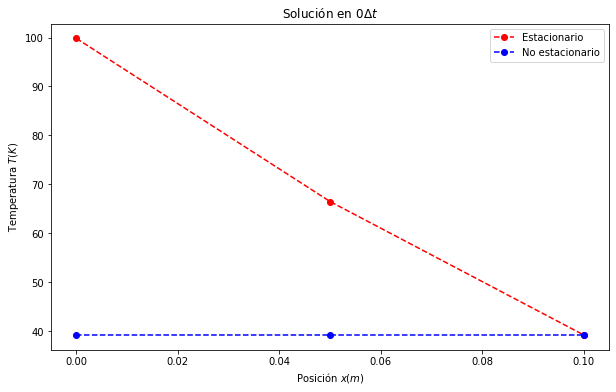

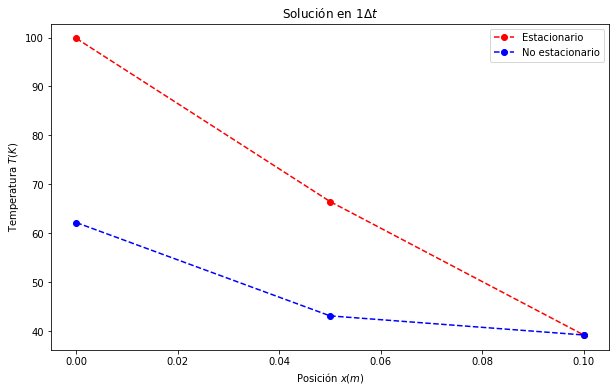

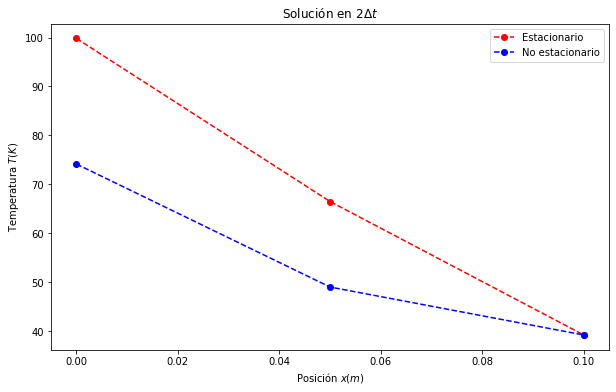

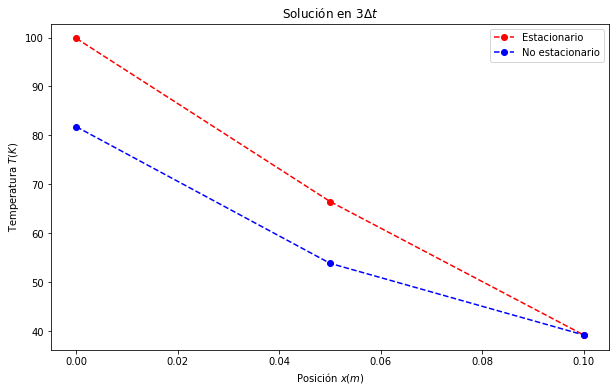

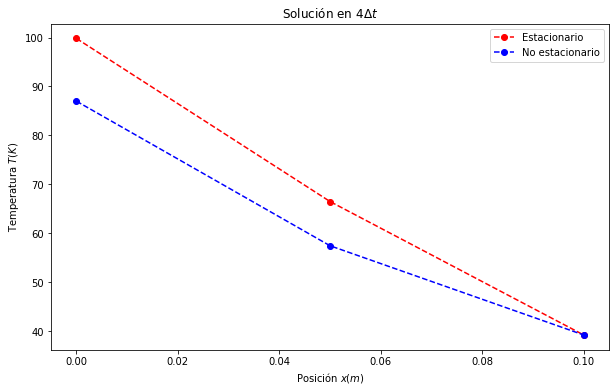

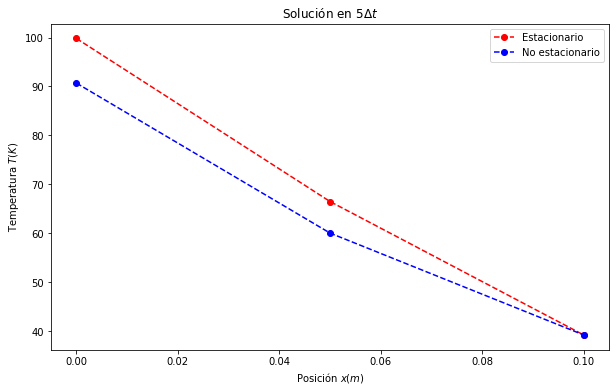

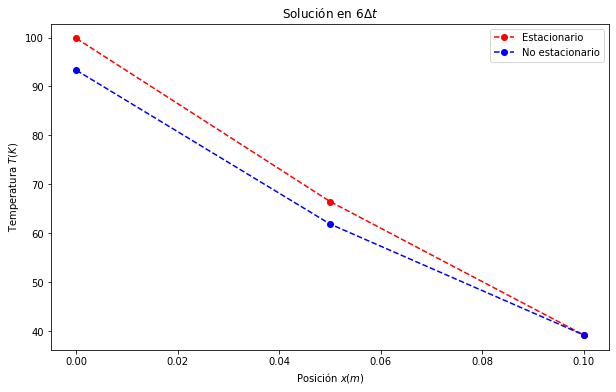

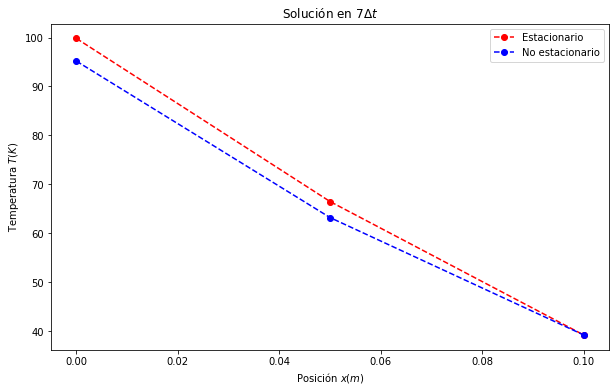

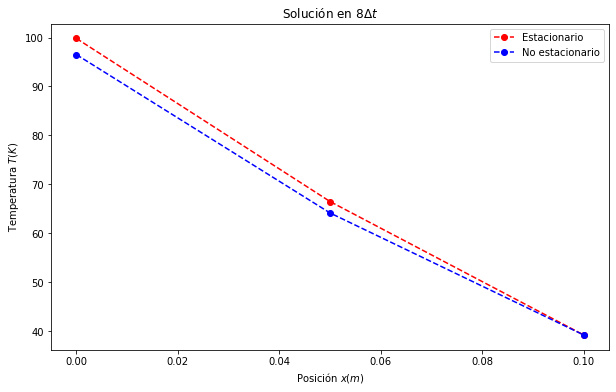

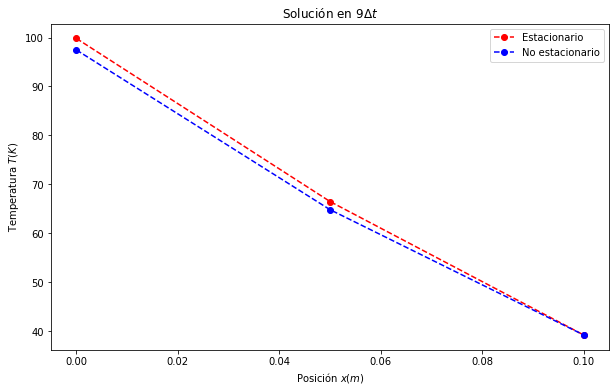

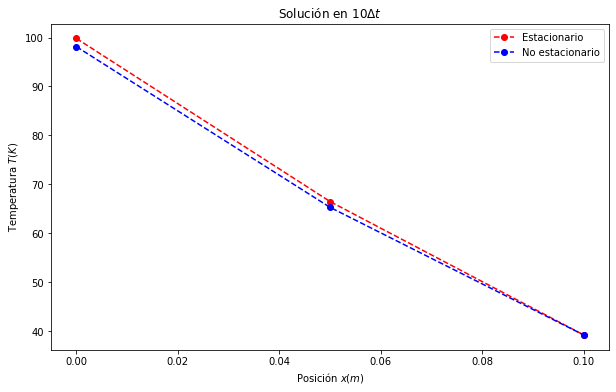

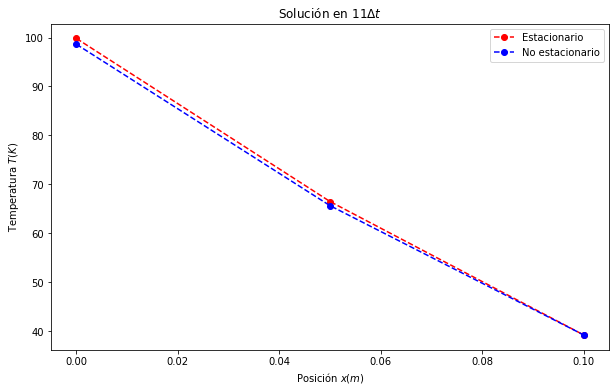

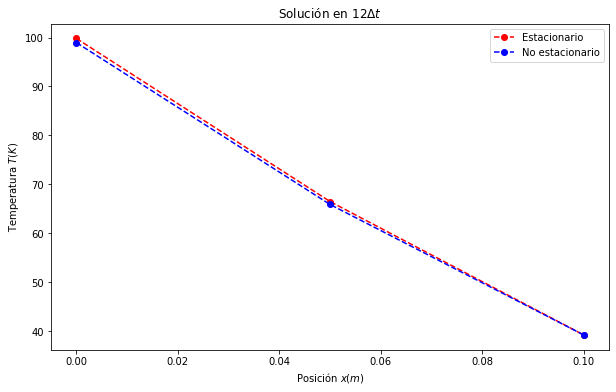

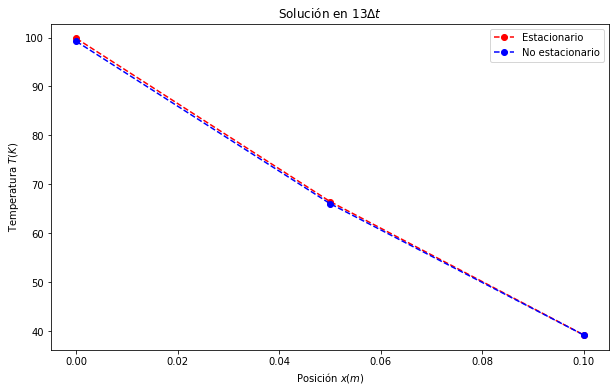

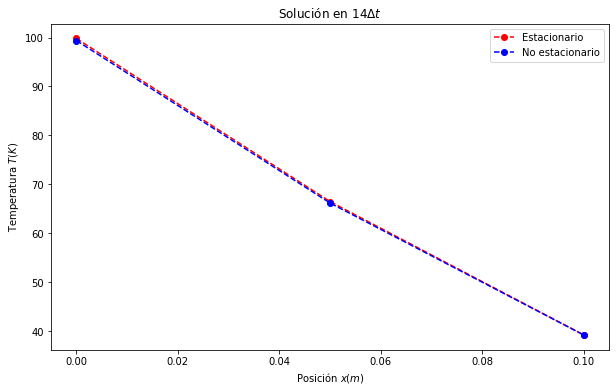

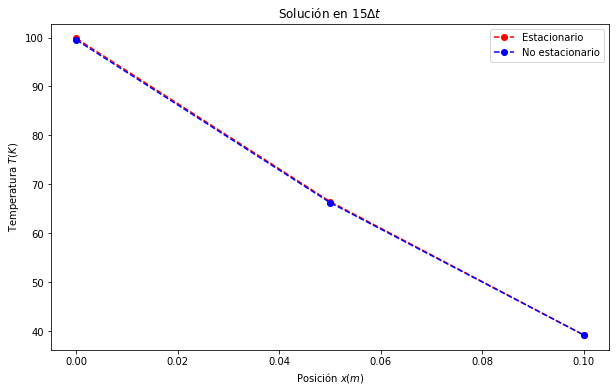

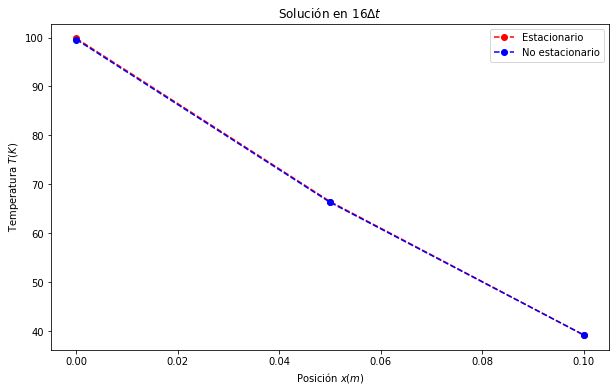

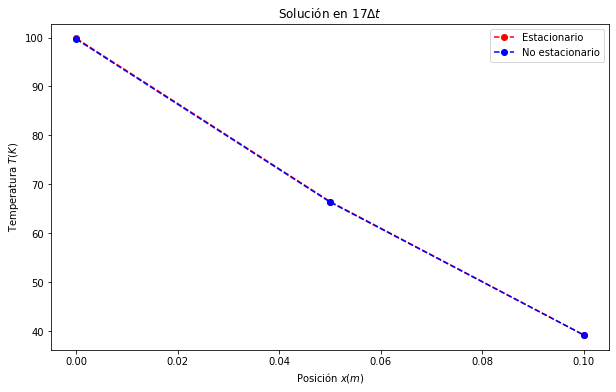

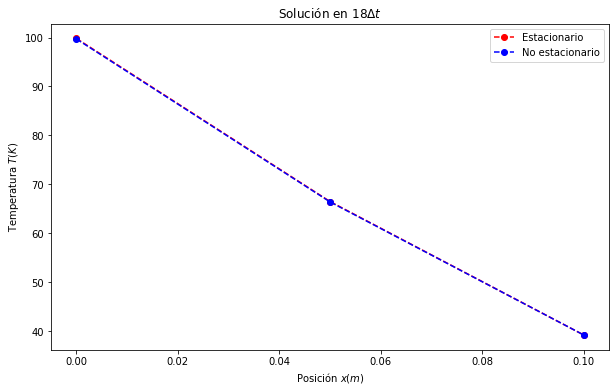

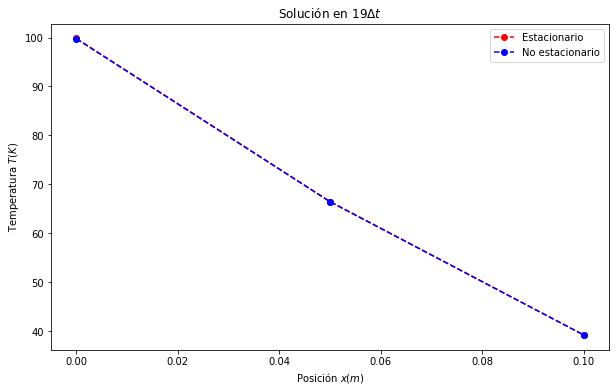

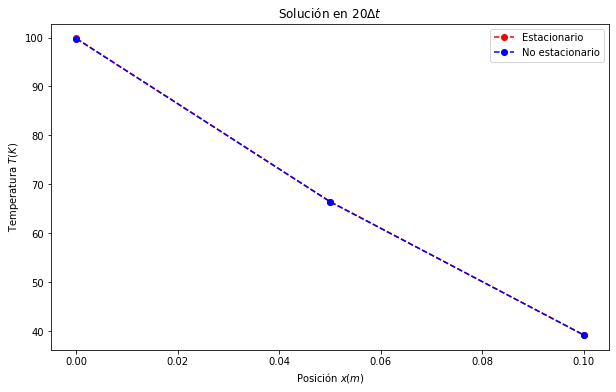

In [16]:
for i,s in enumerate(soluciones):
    plt.figure(figsize=(10,6))
    x_mef = [0,0.05,0.1]
    T_mef = [99.822,66.469,39.18]
    s = np.array([soluciones[i][1][T_1n_1], soluciones[i][1][T_2n_1], soluciones[i][1][T_3n_1]])
    plt.plot(x_mef,T_mef,'--ro', label='Estacionario')
    plt.plot(x_mef,s,'--bo', label='No estacionario')
    plt.xlabel('Posición $x (m)$')
    plt.ylabel('Temperatura $T (K)$')
    plt.title('Solución en ${}\Delta t$'.format(i))
    plt.legend()
    plt.savefig('Imagenes/NoEstacionario{:01d}.png'.format(i))
    plt.show()

In [17]:
len(soluciones)

In [18]:
np.arange(len(soluciones))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

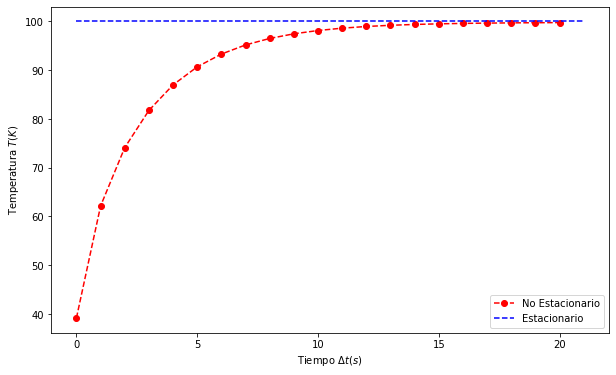

In [19]:
valores = []
for s in soluciones:
    valores.append(s[1][T_1n_1])
    
plt.figure(figsize=(10,6))
t = np.arange(len(soluciones)) #[0,1,2,3,4,5,6,7,8,9,10]

plt.plot(t,np.array(valores).astype(float),'--ro', label='No Estacionario')

plt.plot([0,len(soluciones)],[100,100],'--b', label='Estacionario')

plt.xlabel('Tiempo $\Delta t (s)$')
plt.ylabel('Temperatura $T (K)$')
plt.legend()
plt.savefig('Imagenes/TemperaturaVsTiempo.png'.format(i))
plt.show()